In [1]:
 import numpy as np #Numpy is numerical python: problems where we are required to perform mathematical 
# and logical operations on different sizes of arrays. Since images can also be considered as made up of arrays, 
# we can use NumPy for performing different image processing tasks as well from scratch
import pandas as pd # allows to analyze big data and make conclusin based on statistical theories.
#It can clean messy datasets and make them readable and relevat
import os

In [2]:
# Used to access files from your desktop 
path, dirs, files = next(os.walk('C:/dogvscat/train1')) # next(os.walk(''))-commands the program to go through all files in that location
# counting the number of files in train folder
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  500


In [3]:
file_names = os.listdir('C:/dogvscat/train1') # os.listdir('')-lists all the files present in that directory with ''
print(file_names)

['cat_0.jpg', 'cat_1.jpg', 'cat_10.jpg', 'cat_100.jpg', 'cat_101.jpg', 'cat_102.jpg', 'cat_103.jpg', 'cat_104.jpg', 'cat_105.jpg', 'cat_106.jpg', 'cat_107.jpg', 'cat_108.jpg', 'cat_109.jpg', 'cat_11.jpg', 'cat_110.jpg', 'cat_111.jpg', 'cat_112.jpg', 'cat_113.jpg', 'cat_114.jpg', 'cat_115.jpg', 'cat_116.jpg', 'cat_117.jpg', 'cat_118.jpg', 'cat_119.jpg', 'cat_12.jpg', 'cat_120.jpg', 'cat_121.jpg', 'cat_122.jpg', 'cat_123.jpg', 'cat_124.jpg', 'cat_125.jpg', 'cat_126.jpg', 'cat_127.jpg', 'cat_128.jpg', 'cat_129.jpg', 'cat_13.jpg', 'cat_130.jpg', 'cat_131.jpg', 'cat_132.jpg', 'cat_133.jpg', 'cat_134.jpg', 'cat_135.jpg', 'cat_136.jpg', 'cat_137.jpg', 'cat_138.jpg', 'cat_139.jpg', 'cat_14.jpg', 'cat_140.jpg', 'cat_141.jpg', 'cat_142.jpg', 'cat_143.jpg', 'cat_144.jpg', 'cat_145.jpg', 'cat_146.jpg', 'cat_147.jpg', 'cat_148.jpg', 'cat_149.jpg', 'cat_15.jpg', 'cat_150.jpg', 'cat_151.jpg', 'cat_152.jpg', 'cat_153.jpg', 'cat_154.jpg', 'cat_155.jpg', 'cat_156.jpg', 'cat_157.jpg', 'cat_158.jpg', 'cat

In [5]:
# Importing the Dependencies
from PIL import Image # To load the image, we simply import the image module from the pillow and call the 
#Image. open(), passing the image filename. Instead of calling the Pillow module, we will call the PIL module as to make 
# it backward compatible with an older module called Python Imaging Library (PIL).
import matplotlib.image as mpimg #‘image’ submodule of matplotlib library which supports the basic operations on
#images like loading, rescaling, and displaying the image.
import matplotlib.pyplot as plt # generally used to plot an image in image processing
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [6]:
from sklearn.model_selection import train_test_split # imports train test plate
#Split arrays or matrices into random train and test subsets.
# syntax: sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)[source]¶

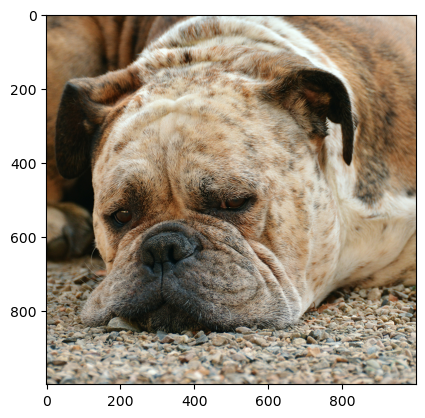

In [7]:
img = mpimg.imread('C:/dogvscat/train1/dog_111.jpg') # maps the file location and reads it
imgplt = plt.imshow(img) # plots the mapped image and stores in imgplt
plt.show() # displays the image

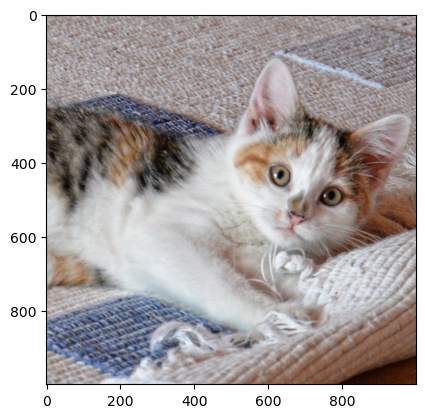

In [8]:
img = mpimg.imread('C:/dogvscat/train1/cat_239.jpg')
imgplt = plt.imshow(img)
plt.show()

In [9]:
# checks the labels of all the files with index number 0 to 5
file_names = os.listdir('C:/dogvscat/train1/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])


cat
cat
cat
cat
cat


In [10]:
# gives us number of cat and dog images
# NOTE: for this program I have perticularly saved each image with its original classification like cat_101 or dog_101
file_names = os.listdir('C:/dogvscat/train1/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 250
Number of cat images = 250


In [11]:
# To work on neural network model we must have all images of same size that is 224/224
os.mkdir('C:/dogvscat/image resized')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:/dogvscat/image resized'

In [12]:
# so we are making copy of the image with size 224,224 and are storing it in 'image resized' folder to avoid any hassle of locating images of same size
original_folder = 'C:/dogvscat/train1/'
resized_folder = 'C:/dogvscat/image resized/'

for i in range(500): # range 500 is given because in total I have 500 images ie 250 dogs and 250 cats
# here I am trying to copy all images from train1 folder to image resized folder and the only change is size of each image will be 224,224
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224)) # Since the initial architectures were developed on input size of 224x224, 
#the newer ones may have adopted that.
# why image resize is of 224: https://www.quora.com/Why-many-deep-learning-models-take-224x224-images-as-input
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

KeyboardInterrupt: 

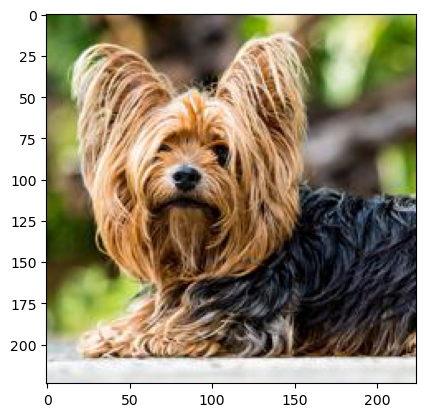

In [13]:
img = mpimg.imread('C:/dogvscat/image resized/dog_1.jpg') # this is the resized image extracted from " image resized" folder
imgplt = plt.imshow(img)
plt.show() # you can see the plot coordinates have changed 

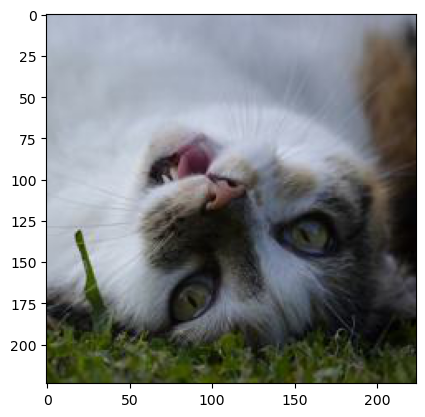

In [14]:
img = mpimg.imread('C:/dogvscat/image resized/cat_111.jpg')
imgplt = plt.imshow(img)
plt.show()

In [15]:
# here we will rename all the images in image resized folder as train1 folder
filenames = os.listdir('C:/dogvscat/image resized/')

labels = [] # creating empty list

for i in range(500):

  file_name = filenames[i]
  label = file_name[0:3]  # this will read the first three letters of the name 'cat','dog'
# this parts basically tells us if the file has a dog or a cat
  if label == 'dog':
    labels.append(1) # if dog we will show 1 in the array 

  else:
    labels.append(0) # 0 for the cat

In [16]:
print(filenames[0:5])
print(len(filenames))

['cat_0.jpg', 'cat_1.jpg', 'cat_10.jpg', 'cat_100.jpg', 'cat_101.jpg']
500


In [17]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
500


In [18]:
# counting the images of dogs and cats using slicing method where we slice the first three letters of the file name
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[250 250]


In [19]:
import cv2
import glob # glob is a function that's used to search for files that match a specific file pattern or name.

In [20]:
# converting all images to numpy array
image_directory = 'C:/dogvscat/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension] # for loop will iterate through the jpg and png file

dog_cat_images = np.asarray([cv2.imread(file) for file in files]) # cv2.imread will read images and help to convert them to a file

In [21]:
print(dog_cat_images)

[[[[ 12  16  17]
   [ 12  16  17]
   [ 12  16  17]
   ...
   [ 19  16  18]
   [ 19  16  18]
   [ 19  16  18]]

  [[ 13  17  18]
   [ 13  17  18]
   [ 13  17  18]
   ...
   [ 19  16  18]
   [ 19  16  18]
   [ 19  16  18]]

  [[ 16  18  19]
   [ 16  18  19]
   [ 16  18  19]
   ...
   [ 17  17  17]
   [ 17  17  17]
   [ 17  17  17]]

  ...

  [[ 43  29  30]
   [ 49  36  34]
   [ 56  44  40]
   ...
   [181 176 167]
   [184 179 170]
   [201 196 187]]

  [[ 52  37  35]
   [ 60  45  43]
   [ 67  52  49]
   ...
   [179 174 165]
   [174 172 162]
   [179 177 167]]

  [[ 50  35  33]
   [ 62  47  44]
   [ 75  60  57]
   ...
   [189 184 175]
   [183 181 171]
   [182 180 170]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [ 19  15  10]
   [ 21  17  12]
   [ 22  18  13]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [ 20  16  11]
   [ 21  17  12]
   [ 22  18  13]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [ 22  16   9]
   [ 23  17  10]
   [ 24  18

In [22]:
type(dog_cat_images)

numpy.ndarray

In [23]:
print(dog_cat_images.shape) # 500 images of 224,224 size and 3 indicates that these are RGB images and if its 1 then it will be gray scale image

(500, 224, 224, 3)


In [24]:
X = dog_cat_images
Y = np.asarray(labels)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2) 
#0.2 indicates we will use 20% of the images out of 500 as test images and 2 indicates we will split the data in similar way all the time

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(500, 224, 224, 3) (400, 224, 224, 3) (100, 224, 224, 3)


In [27]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [28]:
print(X_train_scaled)

[[[[0.02352941 0.02745098 0.01960784]
   [0.03137255 0.03529412 0.02745098]
   [0.05882353 0.04705882 0.03137255]
   ...
   [0.05098039 0.0745098  0.05490196]
   [0.03529412 0.0627451  0.03529412]
   [0.03137255 0.05882353 0.03137255]]

  [[0.02352941 0.02745098 0.01960784]
   [0.02745098 0.03137255 0.02352941]
   [0.05490196 0.04313725 0.02745098]
   ...
   [0.04705882 0.07058824 0.05098039]
   [0.03529412 0.0627451  0.03529412]
   [0.03137255 0.05882353 0.03137255]]

  [[0.01960784 0.02352941 0.01568627]
   [0.02352941 0.02745098 0.01960784]
   [0.05490196 0.04313725 0.02745098]
   ...
   [0.04705882 0.07058824 0.05098039]
   [0.03529412 0.05882353 0.03921569]
   [0.03137255 0.05490196 0.03529412]]

  ...

  [[0.2745098  0.45882353 0.42352941]
   [0.09411765 0.27843137 0.24313725]
   [0.11372549 0.30196078 0.25490196]
   ...
   [0.29019608 0.47843137 0.45490196]
   [0.28627451 0.48627451 0.43137255]
   [0.09803922 0.30588235 0.22745098]]

  [[0.09019608 0.28627451 0.23921569]
   [0.1

In [29]:
import tensorflow as tf
import tensorflow_hub as hub

# creating the neural network

In [30]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
# we will be reshaping and altering the images as per this url link

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [31]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [32]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [33]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
13/13 [==============================] - 41s 858ms/step - loss: 0.4642 - acc: 0.7850
Epoch 2/5
13/13 [==============================] - 10s 758ms/step - loss: 0.1094 - acc: 0.9775
Epoch 3/5
13/13 [==============================] - 10s 759ms/step - loss: 0.0597 - acc: 0.9900
Epoch 4/5
13/13 [==============================] - 10s 781ms/step - loss: 0.0432 - acc: 0.9900
Epoch 5/5
13/13 [==============================] - 10s 733ms/step - loss: 0.0321 - acc: 0.9950


In [34]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

4/4 [==============================] - 5s 628ms/step - loss: 0.0799 - acc: 0.9800
Test Loss = 0.07993124425411224
Test Accuracy = 0.9800000190734863


1/1 [==============================] - 2s 2s/step
[[ 0.78143823 -1.8663561 ]]
0
The image represents a Cat


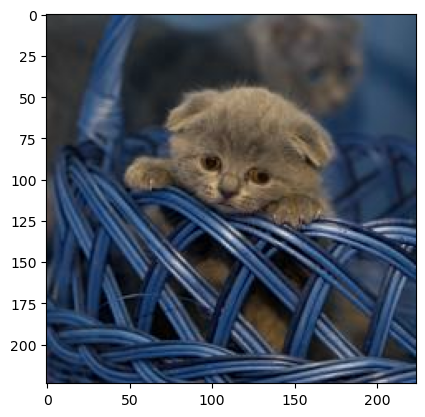

In [35]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
image_path = 'C:/dogvscat/image resized/cat_100.jpg'
input_image = cv2.imread(image_path)
plt.imshow(input_image)
input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')